In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [3]:
df.mean()


N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [5]:
df.median()

N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
dtype: float64

In [6]:
df.mode()


,N,P,K,temperature,humidity,ph,rainfall
0,22.0,60.0,17.0,8.825675,14.258040,3.504752,20.211267
1,40.0,NaN,NaN,9.467960,14.273280,3.510404,20.360011
2,NaN,NaN,NaN,9.535586,14.280419,3.525366,20.390205
3,NaN,NaN,NaN,9.724458,14.323138,3.532009,20.490356
4,NaN,NaN,NaN,9.851243,14.338474,3.558823,20.661278
...,...,...,...,...,...,...,...
2195,NaN,NaN,NaN,43.037143,99.658092,9.416003,291.298662
2196,NaN,NaN,NaN,43.080227,99.724010,9.459493,295.609449
2197,NaN,NaN,NaN,43.302049,99.846716,9.679241,295.924880
2198,NaN,NaN,NaN,43.360515,99.969060,9.926212,298.401847


In [7]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [8]:
df.std()

N              36.917334
P              32.985883
K              50.647931
temperature     5.063749
humidity       22.263812
ph              0.773938
rainfall       54.958389
dtype: float64

In [9]:
df.var()

N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
dtype: float64

In [10]:
df.skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

In [11]:
df.kurtosis()

N             -1.058240
P              0.860279
K              4.449354
temperature    1.232555
humidity       0.302134
ph             1.655581
rainfall       0.607079
dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

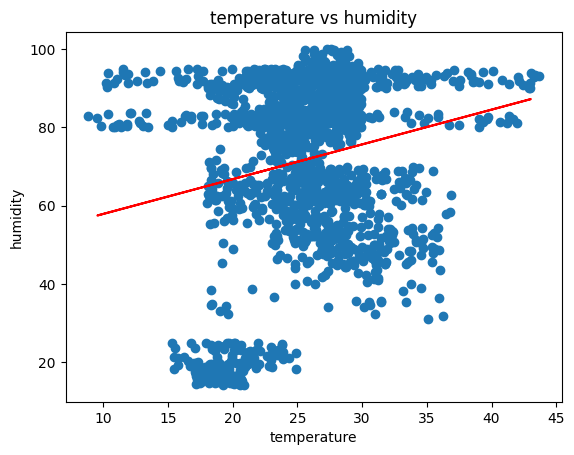

In [15]:
lr = LinearRegression()
x = df[['temperature']]
y = df['humidity']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

lr.fit(xtrain,ytrain)

ypred = lr.predict(xtest)

plt.scatter(xtrain,ytrain)
plt.plot(xtest,ypred,color='red')
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.title('temperature vs humidity')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


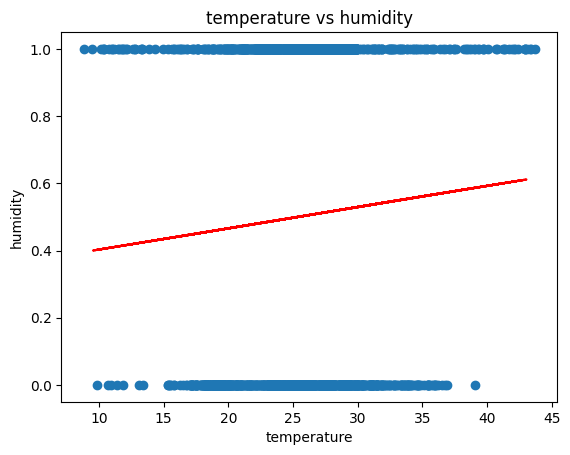

In [18]:
lr = LogisticRegression()
x = df[['temperature']]
y = (df['humidity']>df['humidity'].median()).astype(int)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

lr.fit(xtrain,ytrain)

ypred = lr.predict_proba(xtest)[:,1]

plt.scatter(xtrain,ytrain)
plt.plot(xtest,ypred,color='red')
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.title('temperature vs humidity')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler
import seaborn as sns

0.20227272727272727


<Axes: >

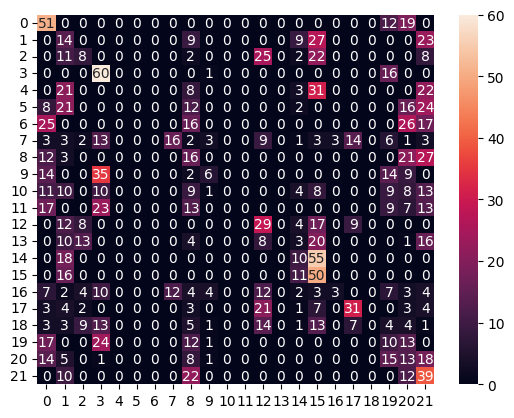

In [25]:
from pandas import read_csv


df = read_csv('crop.csv')
x = df[['temperature']]
y = df['label']

xtest , xtrain , ytest , ytrain = train_test_split(x,y,test_size=0.2,random_state=0)

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

nb = GaussianNB()
nb.fit(xtrain,ytrain)

ypred = nb.predict(xtest)

print(accuracy_score(ytest,ypred))

cm = confusion_matrix(ytest,ypred)

sns.heatmap(cm,annot=True,fmt='d')

In [26]:
from sklearn.svm import SVC

In [30]:
x = df.drop(columns = ['label'])
y = df['label']

sd = StandardScaler()
x = sd.fit_transform(x)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

sv = SVC(kernel='rbf' , C=1.0)
sv.fit(xtrain,ytrain)

ypred = sv.predict(xtest)

print(accuracy_score(ytest,ypred))

print(confusion_matrix(ytest,ypred))

0.9772727272727273
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

In [32]:
from sklearn.decomposition import PCA
import numpy as np


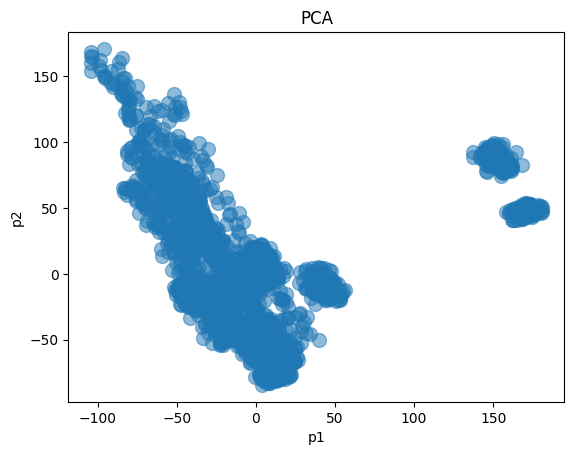

In [43]:
z = df.drop(columns = ['label'])
sd.fit_transform(z)

pca = PCA(n_components=2)
x= pca.fit_transform(z)

pf = pd.DataFrame(data=x,columns=['p1','p2'])

plt.scatter(pf['p1'],pf['p2'],s=100,alpha=0.5)
plt.xlabel('p1')    
plt.ylabel('p2')
plt.title('PCA')
plt.show()



<Axes: xlabel='temperature', ylabel='humidity'>

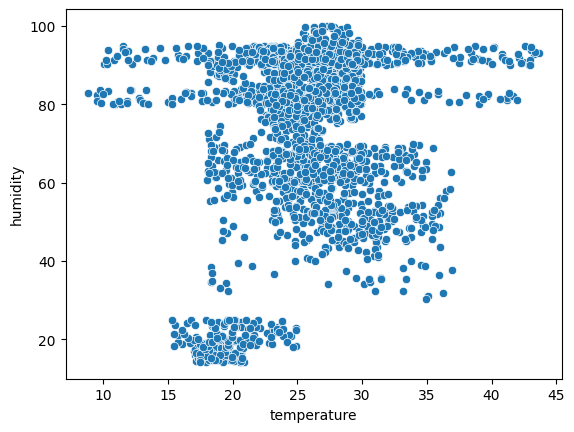

In [ ]:
sns.scatterplot(x='temperature',y='humidity',data=df,hue='label')

<Axes: xlabel='temperature', ylabel='Density'>

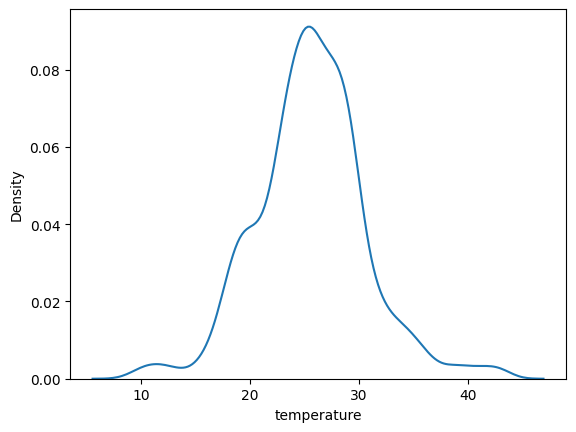

In [51]:
sns.kdeplot(x='temperature',data=df)

<Axes: xlabel='temperature', ylabel='humidity'>

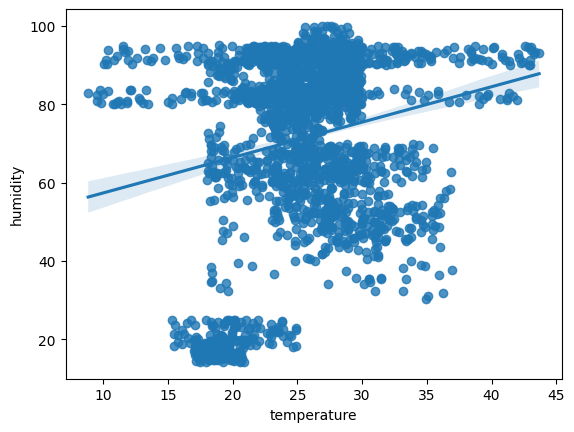

In [52]:
sns.regplot(x='temperature',y='humidity',data=df)

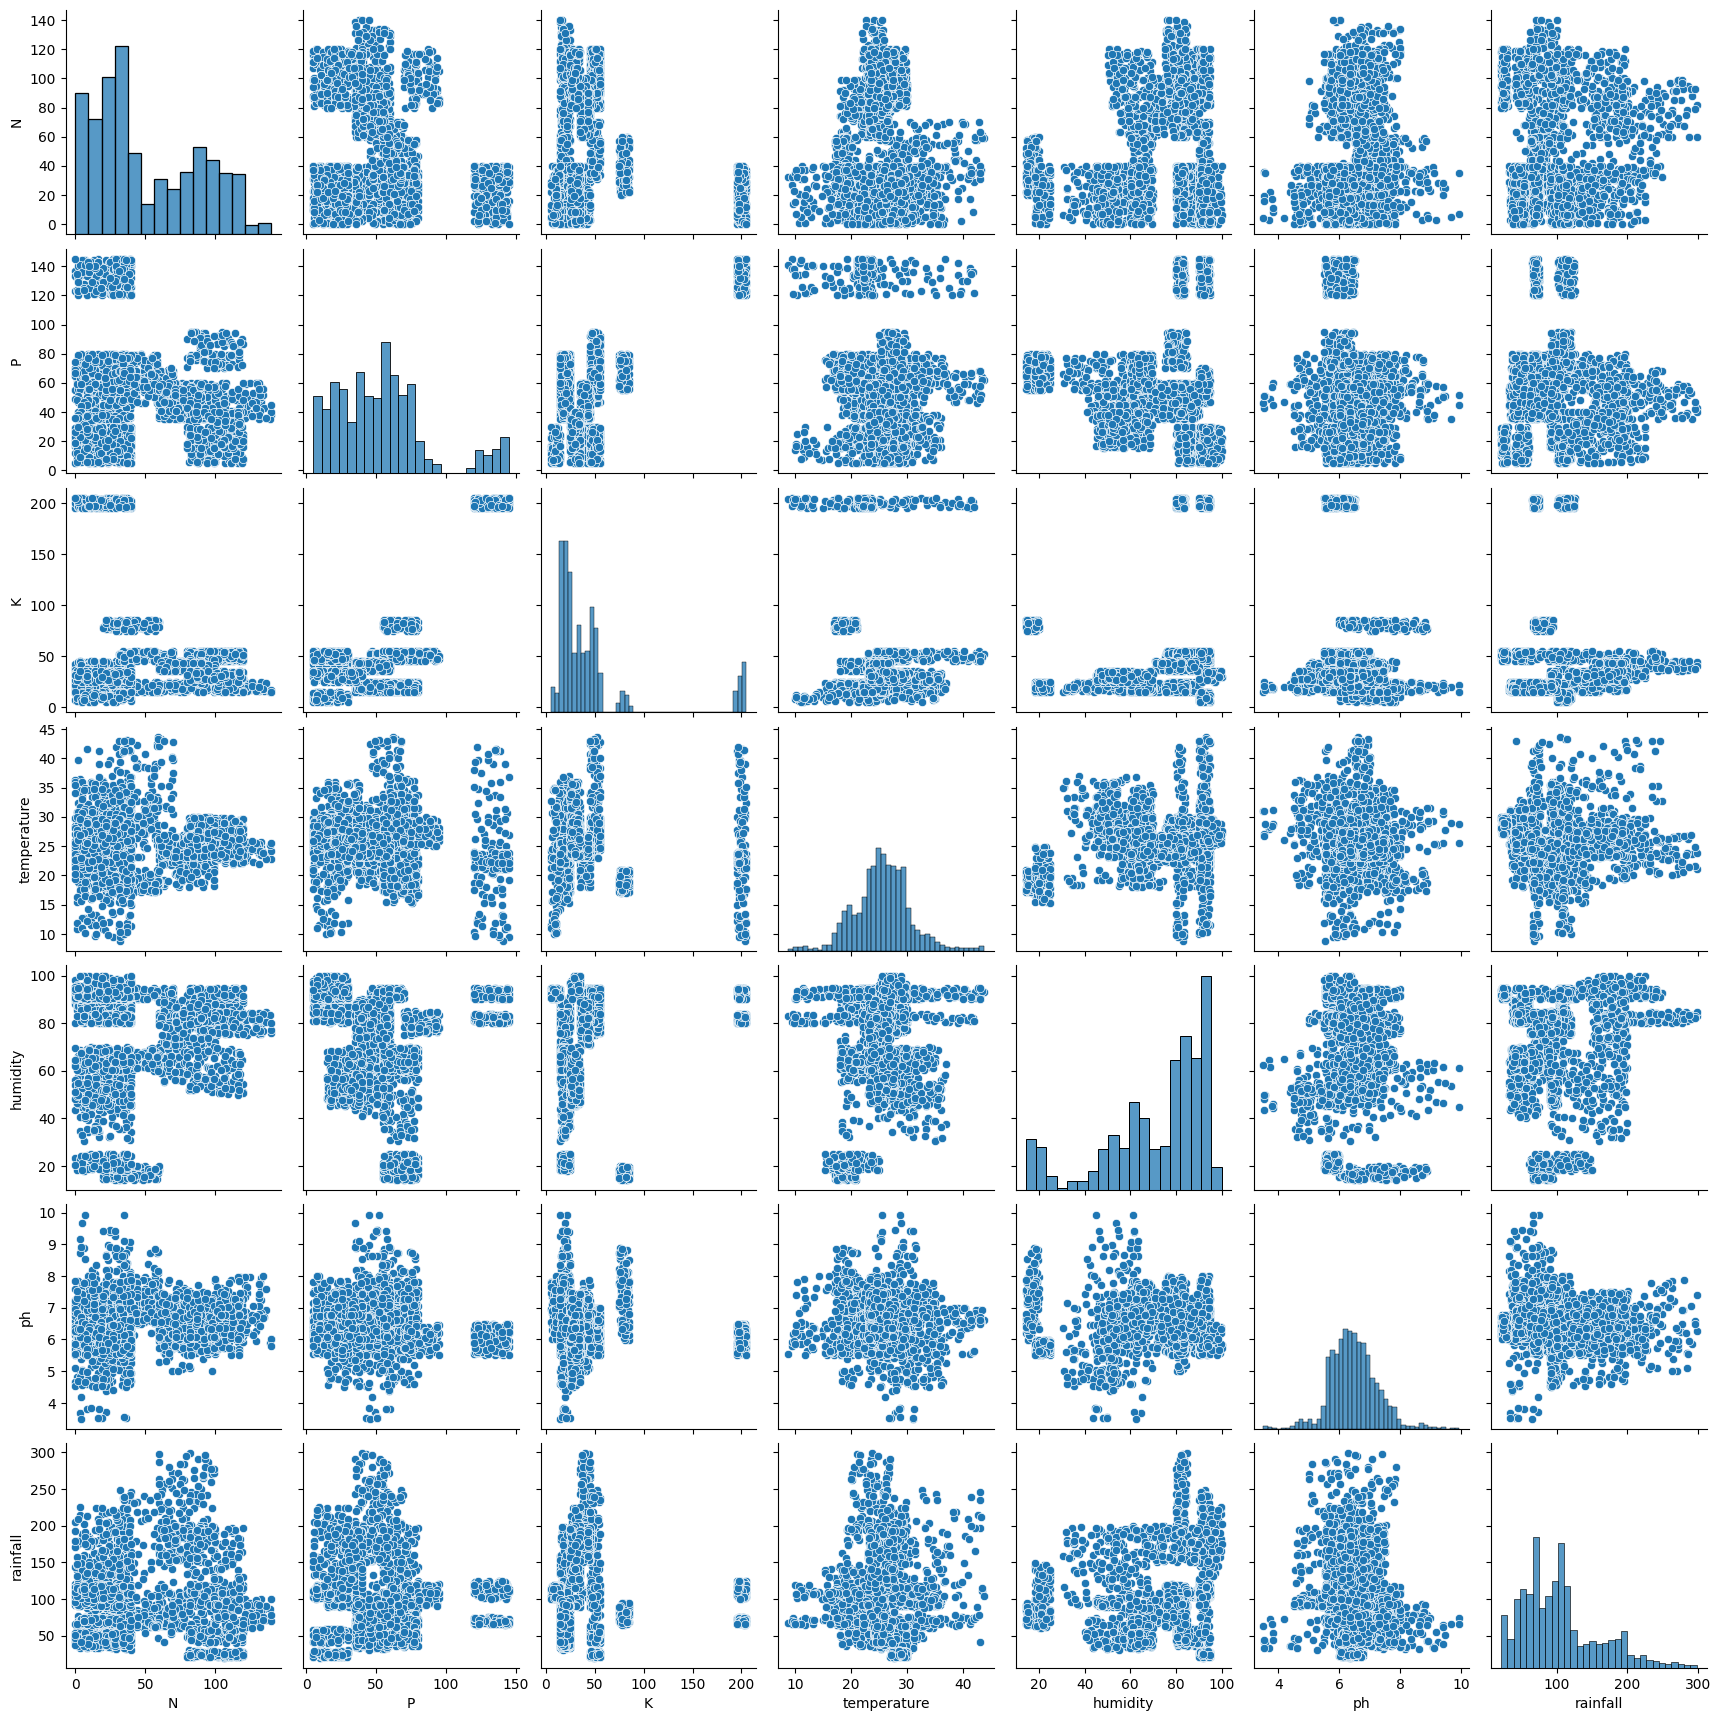

In [53]:
sns.pairplot(df)

In [58]:
import plotly.express as px
fg = px.scatter(df,x='temperature',y='humidity',color='label')
fg.show()

In [61]:
from bokeh.plotting import figure , show
p = figure(title='scatter plot')
p.scatter(x='temperature',y='humidity',source = df)
show(p)


In [62]:

p = figure(title='scatter plot')
p.line(x='temperature',y='humidity',source = df)
show(p)


In [64]:
df.pivot_table(values="temperature", index="humidity", aggfunc="mean")

,temperature
humidity,
14.258040,20.566019
14.273280,17.928459
14.280419,19.258256
14.323138,20.888187
14.338474,17.437327
...,...
99.658092,26.296449
99.724010,25.600337
99.846716,26.916419
